<a href="https://colab.research.google.com/github/tu-ru-tunc/PVLubimova/blob/main/3_%D0%A1%D0%BE%D0%B2%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D1%86_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving photo_2024-11-13_20-11-34.jpg to photo_2024-11-13_20-11-34.jpg
Saving photo_2024-11-13_20-11-35.jpg to photo_2024-11-13_20-11-35.jpg
Saving photo_2024-11-13_20-11-36.jpg to photo_2024-11-13_20-11-36.jpg
Saving photo_2024-11-13_20-11-37.jpg to photo_2024-11-13_20-11-37.jpg
Saving photo_2024-11-13_20-11-38.jpg to photo_2024-11-13_20-11-38.jpg
Saving photo_2024-11-13_20-11-39.jpg to photo_2024-11-13_20-11-39.jpg
Saving photo_2024-11-13_20-11-41.jpg to photo_2024-11-13_20-11-41.jpg
Saving photo_2024-11-13_20-11-45.jpg to photo_2024-11-13_20-11-45.jpg
Saving photo_2024-11-13_20-11-48.jpg to photo_2024-11-13_20-11-48.jpg
Saving photo_2024-11-13_20-11-53.jpg to photo_2024-11-13_20-11-53.jpg
Saving photo_2024-11-13_20-11-54.jpg to photo_2024-11-13_20-11-54.jpg
Saving photo_2024-11-13_20-11-56.jpg to photo_2024-11-13_20-11-56.jpg
Saving photo_2024-11-13_20-11-57.jpg to photo_2024-11-13_20-11-57.jpg
Saving photo_2024-11-13_20-11-58.jpg to photo_2024-11-13_20-11-58.jpg
Saving photo_2024-11

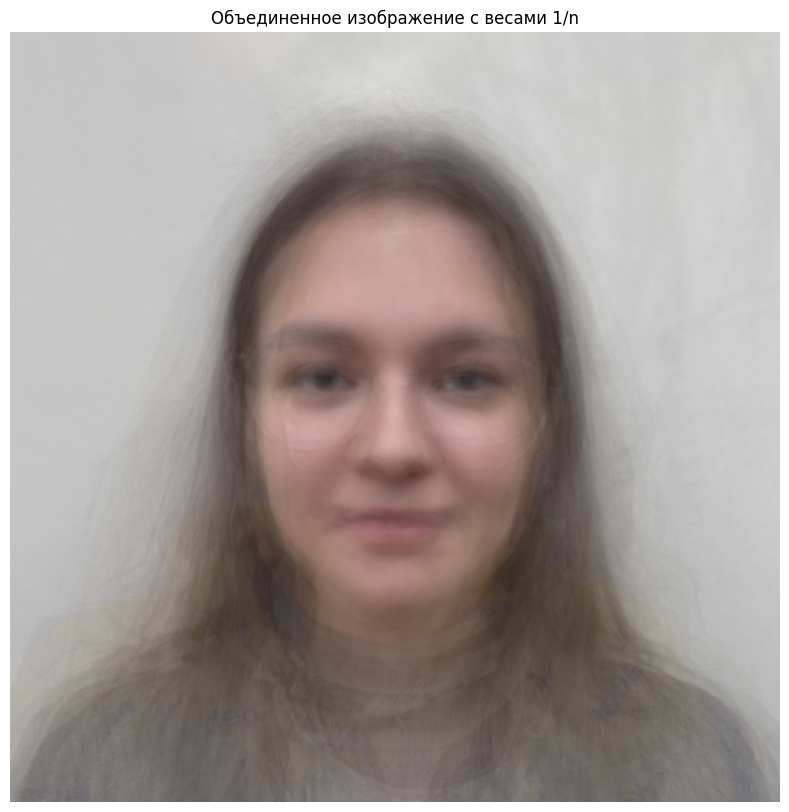

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Функция для извлечения фрагмента изображения
def extract_face_fragment(image):
    # Загружаем каскадный классификатор для обнаружения лиц
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:
        # Вычисляем размеры фрагмента
        fragment_size = (w * 2, h * 2)

        # Определяем координаты фрагмента
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

# Загружаем изображения
uploaded = files.upload()

# Список для хранения всех фрагментов
all_fragments = []

# Извлекаем фрагменты для каждого загруженного изображения
for filename in uploaded.keys():
    # Читаем изображение
    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

# Изменяем размеры фрагментов, чтобы они совпадали
target_size = (500, 500)  # Задайте желаемый размер (ширина, высота)
resized_fragments = [cv2.resize(fragment, target_size) for fragment in all_fragments]

# Сложение всех изображений с весом 1/n
n = len(resized_fragments)
combined_image = np.zeros_like(resized_fragments[0], dtype=np.float32)  # Создаем пустое изображение для сложения

for fragment in resized_fragments:
  combined_image += fragment / n  # Сложение с учетом веса

combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)  # Приведение значений к диапазону [0, 255]

# Отображаем объединенное изображение
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Объединенное изображение с весами 1/n")
plt.show()